## MultiClass Classification

In [39]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

print(tf.__version__)


2.14.0


In [40]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

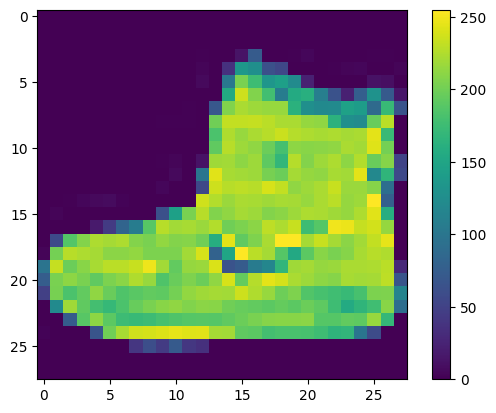

(60000, 28, 28)
(60000,)


In [41]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

train_images, test_images = train_images/255, test_images/255

print(train_images.shape)
print(train_labels.shape)

In [45]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(units=128,activation="relu"),
    tf.keras.layers.Dense(units=64,activation="relu"),
    tf.keras.layers.Dense(units=32,activation="relu"),
    tf.keras.layers.Dense(units=10,activation="linear"),
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
  )

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5124 - accuracy: 0.8170
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3711 - accuracy: 0.8652
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3369 - accuracy: 0.8752
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3128 - accuracy: 0.8846
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2957 - accuracy: 0.8903
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2846 - accuracy: 0.8936
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2706 - accuracy: 0.8991
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2593 - accuracy: 0.9021
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2499 - accuracy: 0.9056
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.242

In [46]:
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Loss -- {loss}")
print(f"Accuracy -- {accuracy}")

313/313 [==============================] - 0s 1ms/step - loss: 0.3594 - accuracy: 0.8793
Loss -- 0.3594423234462738
Accuracy -- 0.8792999982833862


In [48]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

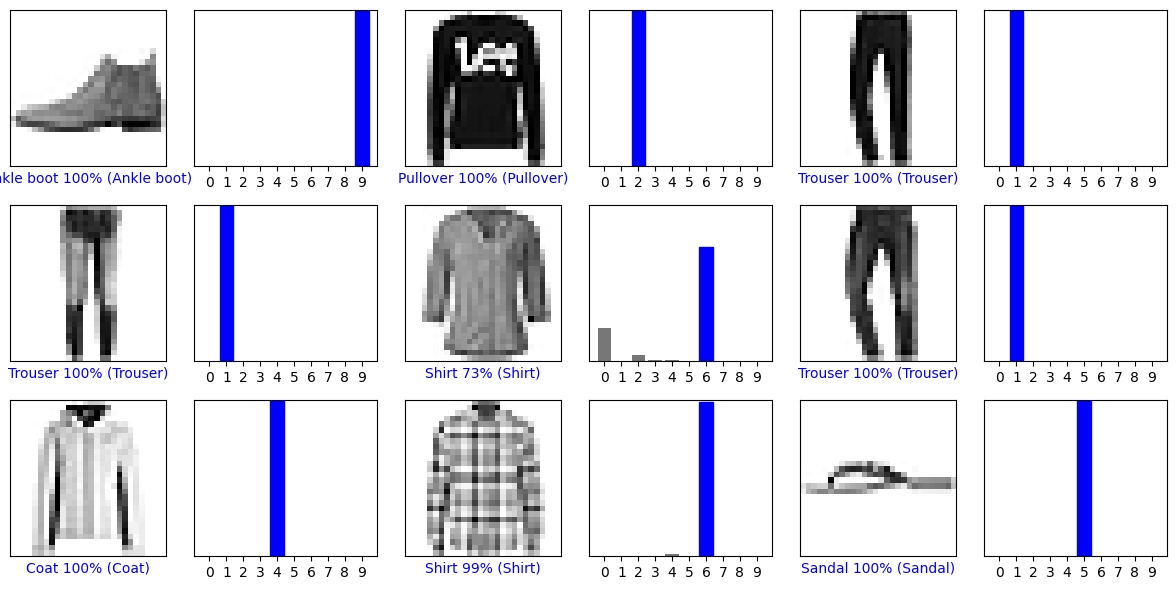

In [50]:
logits = model(test_images)
predictions = tf.nn.softmax(logits)

num_rows = 3
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()